# 102 Prepare MAGICC offset

In this notebook, we prepare the offset factor to apply to each ensemble member so that we get a WG3 consistent warming assessment.

In [1]:
import json
import os
from pathlib import Path

import dotenv
import matplotlib.pyplot as plt
import openscm_runner
import scmdata
import pyam
import numpy as np

from climate_assessment.climate.wg3 import clean_wg3_scenarios
from climate_assessment.climate.magicc7 import get_magicc7_configurations

%load_ext nb_black

<IPython.core.display.Javascript object>

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [2]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [3]:
os.environ['MAGICC_EXECUTABLE_7']=os.path.join(
    os.environ['MAGICC_7_BIN'],
    'magicc-darwin-amd64'
)
os.environ['DYLD_LIBRARY_PATH'] = os.environ['DYLD_PATH_GCC']

<IPython.core.display.Javascript object>

Step 1: Read in the processed input data and select one scenario for an illustrative run.

In [4]:
df_all = pyam.IamDataFrame(
    Path(
        '../data/100_scenarios.csv'
    )
)

pyam.core - INFO: Reading file ../data/100_scenarios.csv


<IPython.core.display.Javascript object>

In [5]:
illustrative_pathway = df_all.filter(
    model='REMIND*',
    scenario='DeepElec*'
)

<IPython.core.display.Javascript object>

Step 2: Read in the MAGICC7 configurations.

In [6]:
all_magicc_cfgs,_ = get_magicc7_configurations(
    magicc_version='v7.5.3',
    magicc_probabilistic_file=os.environ['MAGICC_AR6_PROBABILISTIC_DISTRIBUTION'],
    magicc_extra_config=None,
    num_cfgs=600,
    co2_and_non_co2_warming=True
)
magicc_all_cfg = [x for x in all_magicc_cfgs if x['rf_total_runmodus']=='ALL']

<IPython.core.display.Javascript object>

Step 3: Prepare the input scenario to run through.

In [7]:
input_scm = scmdata.ScmRun(
    clean_wg3_scenarios(
        illustrative_pathway
    )
)

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/climate_assessment/climate/wg3.py:42: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean["variable"] = df_clean["variable"].str.replace(old, new)


<IPython.core.display.Javascript object>

Step 4: Run this through MAGICC.

In [8]:
temp_raw = openscm_runner.run(
    {'MAGICC7':magicc_all_cfg},
    input_scm,
    output_variables=[
        'Surface Temperature'
    ]
)

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Historical data has not been checked


/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/openscm_units/_unit_registry.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, val in metric_conversion.iteritems():


Writing SCEN7 files:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Front serial:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

Front parallel:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

Parallel runs:   0%|          | 0.00/596 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

<IPython.core.display.Javascript object>

Step 5: Calculate the warming relative to the 1850-1900 average.

In [9]:
temp_1850_1900 = (
    temp_raw
    .filter(region='World')
    .relative_to_ref_period_mean(
        year=range(1850, 1901)
    )
)

<IPython.core.display.Javascript object>

Step 6: Calculate the average across the 1995 - 2014 timeframe.

In [10]:
average_1995_2014_across_ensemble = (
    temp_1850_1900
    .filter(year=range(1995,2015))
    .timeseries()
    .mean(axis=1)
)

<IPython.core.display.Javascript object>

<Axes: ylabel='Frequency'>

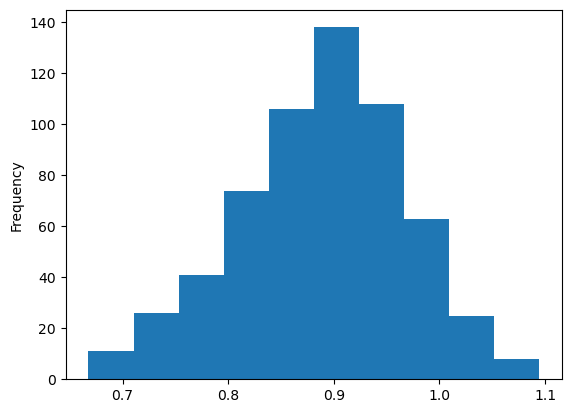

<IPython.core.display.Javascript object>

In [11]:
average_1995_2014_across_ensemble.plot(kind='hist')

Step 7: Calculate the median across these ensemble members.

In [12]:
median_across_ensemble = average_1995_2014_across_ensemble.median() 

<IPython.core.display.Javascript object>

In [13]:
median_across_ensemble

0.8925340207402139

<IPython.core.display.Javascript object>

Step 8: Calculate the deviation from the expected warming (0.85C)

In [14]:
magicc_number = 0.85 - median_across_ensemble

<IPython.core.display.Javascript object>

In [15]:
magicc_number

-0.04253402074021395

<IPython.core.display.Javascript object>

Step 9: Save the MAGICC number for future use.

In [16]:
np.save(
    '../data/magicc_number.npy',
    magicc_number
)

<IPython.core.display.Javascript object>